In [106]:
#importing the module cv2 and numpy
import cv2
import numpy as np
#import skimage
import matplotlib.pyplot as plt


In [107]:
#reading the image which is to be converted to HSV color space
loc='/home/karan/Remote-vegetation-sensing/data/sample.tiff'
imagergb = cv2.imread(loc)
hsvImage = cv2.cvtColor(imagergb, cv2.COLOR_BGR2HSV)


In [108]:
#converting the image to HSV color space using cvtColor function
imagehsv = cv2.cvtColor(imagergb, cv2.COLOR_BGR2HSV)
cv2.imwrite("/home/karan/Remote-vegetation-sensing/module/sample.tiff", imagergb)
cv2.imwrite("/home/karan/Remote-vegetation-sensing/module/sample_hsv.tiff", imagehsv)
cv2.imwrite("/home/karan/Remote-vegetation-sensing/module/sample_hsv.png", imagehsv)






True

In [109]:
def imagemask(lower,upper,name):
    lower=np.array(lower)
    upper=np.array(upper)
    imagemask=cv2.inRange(imagehsv, lower, upper)
    cv2.imwrite(f"/home/karan/Remote-vegetation-sensing/module/{name}.tiff", imagemask)


In [110]:
# imagemask fucntion Syntax imagemask([lowerthreshold],[upperthreshold],nameoffile)
imagemask([60, 42, 43],[135, 255, 255],"crop")
imagemask([29, 72, 39],[42, 100, 250],"barenland")
imagemask([0, 0, 0],[359, 84, 80],"cultivated_land")
imagemask([0, 87, 69],[130, 100, 80],"tree")
imagemask([26, 40, 70],[90, 60, 110],"water")




In [111]:
original='/home/karan/Remote-vegetation-sensing/module/sample.tiff'
hsv="/home/karan/Remote-vegetation-sensing/module/sample_hsv.tiff"
tree="/home/karan/Remote-vegetation-sensing/module/tree.tiff"
barenland="/home/karan/Remote-vegetation-sensing/module/barenland.tiff"
cultivated_land="/home/karan/Remote-vegetation-sensing/module/cultivated_land.tiff"
crop="/home/karan/Remote-vegetation-sensing/module/crop.tiff"
water="/home/karan/Remote-vegetation-sensing/module/water.tiff"

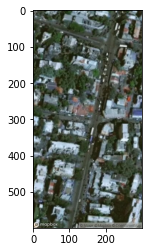

In [112]:
plt.imshow(imagergb)
plt.show()

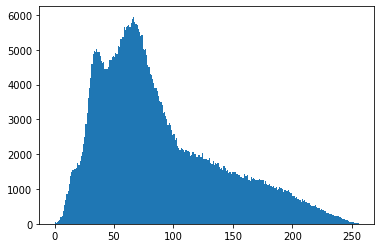

In [113]:
plt.hist(imagergb.ravel(),256,[0,256])
plt.show()

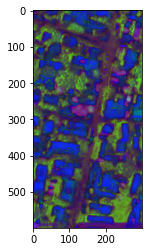

In [114]:
hsv=cv2.imread(hsv)
plt.imshow(hsv)
plt.show()


In [115]:

def area(path,name):



    img = cv2.imread(path)

    # counting the number of pixels
    number_of_white_pix = np.sum(img == 255)
    number_of_black_pix = np.sum(img == 0)
    total=number_of_white_pix + number_of_black_pix
    percent=(number_of_white_pix/total)*100
    return {name:percent}


data={}
data.update({'Data' : 'percentage'})
data.update(area(tree,'tree'))
data.update(area(crop,'crop'))
data.update(area(barenland,'barenland'))
data.update(area(cultivated_land,'cultivated_land'))

total={}
total.update(area(tree,'tree'))
total.update(area(crop,'crop'))
total.update(area(barenland,'barenland'))
total.update(area(cultivated_land,'cultivated_land'))

total=total.values()
add=0
for i in total:
    add=add+i
add=100-add
data["Unknown"] = add

In [116]:

  
# reading the image data from desired directory
img = cv2.imread(tree)
  
# counting the number of pixels
number_of_white_pix = np.sum(img == 255)
number_of_black_pix = np.sum(img == 0)
total=number_of_white_pix + number_of_black_pix
percent=(number_of_white_pix/total)*100
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)
print('Number of total pixels:', total)
print('Pecentage covered:', percent)

Number of white pixels: 3759
Number of black pixels: 536241
Number of total pixels: 540000
Pecentage covered: 0.6961111111111111


In [117]:
# reading the image data from desired directory
img = cv2.imread(barenland)
  
# counting the number of pixels
number_of_white_pix = np.sum(img == 255)
number_of_black_pix = np.sum(img == 0)
total=number_of_white_pix + number_of_black_pix
percent=(number_of_white_pix/total)*100
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)
print('Number of total pixels:', total)
print('Pecentage covered:', percent)

Number of white pixels: 1587
Number of black pixels: 538413
Number of total pixels: 540000
Pecentage covered: 0.29388888888888887


In [118]:
image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(image,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
pixels = cv2.countNonZero(thresh)
# pixels = len(np.column_stack(np.where(thresh > 0)))

image_area = image.shape[0] * image.shape[1]
area_ratio = (pixels / image_area) * 100

print('pixels', pixels)
print('area ratio', area_ratio)


pixels 50601
area ratio 28.111666666666668


In [119]:
image = cv2.imread(tree, cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(image,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
pixels = cv2.countNonZero(thresh)
# pixels = len(np.column_stack(np.where(thresh > 0)))

image_area = image.shape[0] * image.shape[1]
area_ratio = (pixels / image_area) * 100

print('pixels', pixels)
print('area ratio', area_ratio)



pixels 1253
area ratio 0.6961111111111111


In [120]:
image = cv2.imread(barenland, cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(image,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
pixels = cv2.countNonZero(thresh)
# pixels = len(np.column_stack(np.where(thresh > 0)))

image_area = image.shape[0] * image.shape[1]
area_ratio = (pixels / image_area) * 100

print('pixels', pixels)
print('area ratio', area_ratio)

pixels 529
area ratio 0.29388888888888887


In [121]:
image = cv2.imread(cultivated_land, cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(image,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
pixels = cv2.countNonZero(thresh)
# pixels = len(np.column_stack(np.where(thresh > 0)))

image_area = image.shape[0] * image.shape[1]
area_ratio = (pixels / image_area) * 100

print('pixels', pixels)
print('area ratio', area_ratio)

pixels 50573
area ratio 28.09611111111111


In [122]:
image = cv2.imread(crop, cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(image,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
pixels = cv2.countNonZero(thresh)
# pixels = len(np.column_stack(np.where(thresh > 0)))

image_area = image.shape[0] * image.shape[1]
area_ratio = (pixels / image_area) * 100

print('pixels', pixels)
print('area ratio', area_ratio)

pixels 50463
area ratio 28.035


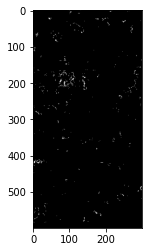

In [123]:
tree=cv2.imread(tree)
plt.imshow(tree)
plt.show()


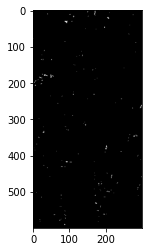

In [124]:
barenland=cv2.imread(barenland)
plt.imshow(barenland)
plt.show()

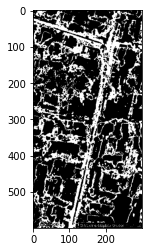

In [125]:
cultivated_land=cv2.imread(cultivated_land)
plt.imshow(cultivated_land)
plt.show()

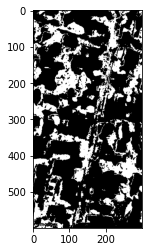

In [126]:
crop=cv2.imread(crop)
plt.imshow(crop)
plt.show()

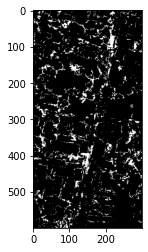

In [127]:
imagemask([26, 40, 70],[90, 60, 110],"water")
water="/home/karan/Remote-vegetation-sensing/module/water.tiff"
water=cv2.imread(water)
plt.imshow(water)
plt.show()

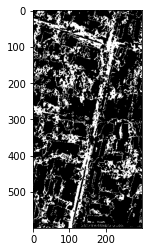

In [141]:
imagemask([20, 20, 60],[255, 255, 80],"road_and_building")
water="/home/karan/Remote-vegetation-sensing/module/road_and_building.tiff"
water=cv2.imread(water)
plt.imshow(water)
plt.show()